In [1]:
import numpy as np
import matplotlib.pyplot as plt

# RK3 implementation
def rk3_rhs(f, x0, tspan, dt, args=()):
    t0, tf = tspan
    N = int((tf - t0) / dt)
    t = np.linspace(t0, tf, N+1)
    x = np.zeros((N+1, len(x0)))
    x[0] = x0
    for i in range(N):
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + dt/2, x[i] + dt/2 * k1, *args)
        k3 = f(t[i] + dt, x[i] - dt * k1 + 2 * dt * k2, *args)
        x[i+1] = x[i] + dt / 6 * (k1 + 4*k2 + k3)
    return t, x

# Pendulum dynamics
def pendulum_rhs(t, state, gamma, Omega2, f, omega):
    theta, theta_dot = state
    dtheta = theta_dot
    dtheta_dot = -gamma * theta_dot - Omega2 * np.sin(theta) + f * np.cos(omega * t)
    return np.array([dtheta, dtheta_dot])


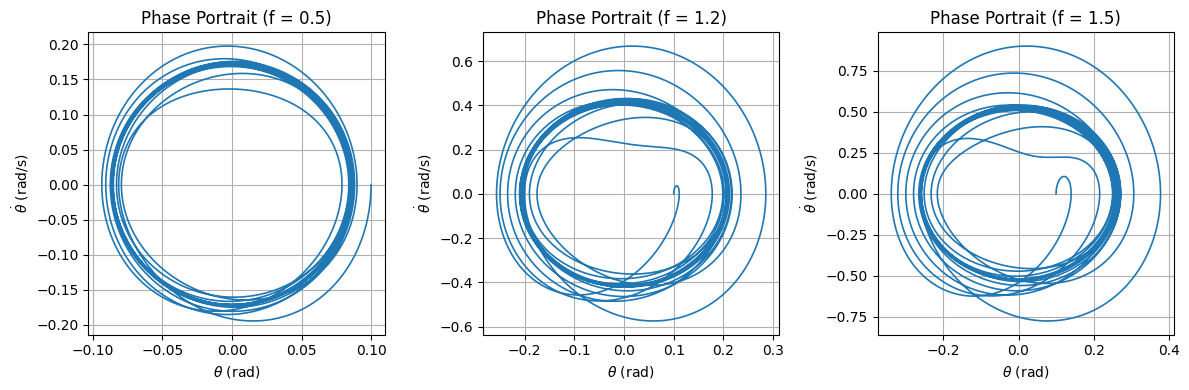

In [2]:
# Parameters
gamma = 0.2
Omega2 = 9.81
omega = 2.0
dt = 0.005
T = 50
x0 = [0.1, 0.0]

# Simulate for different f values
f_values = [0.5, 1.2, 1.5]
trajectories_f = []
for f_val in f_values:
    t, x = rk3_rhs(pendulum_rhs, x0, (0, T), dt, args=(gamma, Omega2, f_val, omega))
    trajectories_f.append((f_val, t, x))

# Plot
plt.figure(figsize=(12, 4))
for i, (f_val, t, x) in enumerate(trajectories_f):
    plt.subplot(1, 3, i+1)
    plt.plot(x[:, 0], x[:, 1], linewidth=1.2)
    plt.title(f'Phase Portrait (f = {f_val})')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\dot{\theta}$ (rad/s)')
    plt.grid(True)
plt.tight_layout()
plt.show()


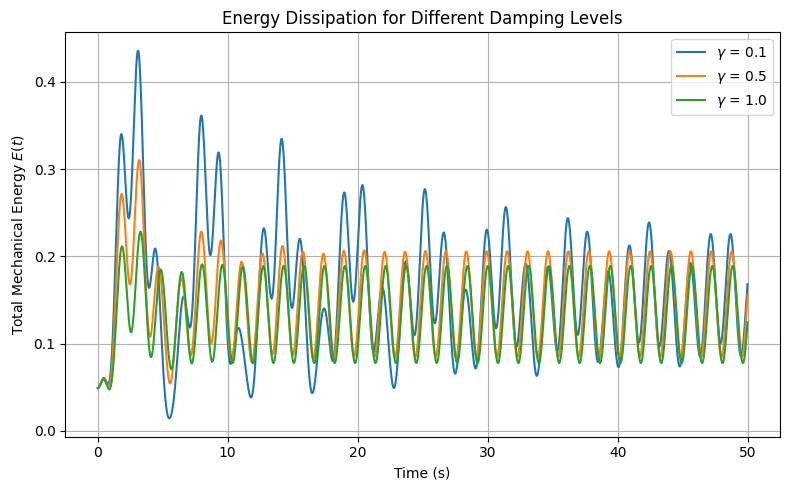

In [3]:
# Energy trajectories for various gamma
f = 1.2
trajectories_gamma = []
for gamma_val in [0.1, 0.5, 1.0]:
    t, x = rk3_rhs(pendulum_rhs, x0, (0, T), dt, args=(gamma_val, Omega2, f, omega))
    trajectories_gamma.append((gamma_val, t, x))

# Plot energy
plt.figure(figsize=(8, 5))
for gamma_val, t, x in trajectories_gamma:
    theta, theta_dot = x[:, 0], x[:, 1]
    E = 0.5 * theta_dot**2 + Omega2 * (1 - np.cos(theta))  # Total energy
    plt.plot(t, E, label=fr'$\gamma$ = {gamma_val}')
plt.xlabel('Time (s)')
plt.ylabel('Total Mechanical Energy $E(t)$')
plt.title('Energy Dissipation for Different Damping Levels')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


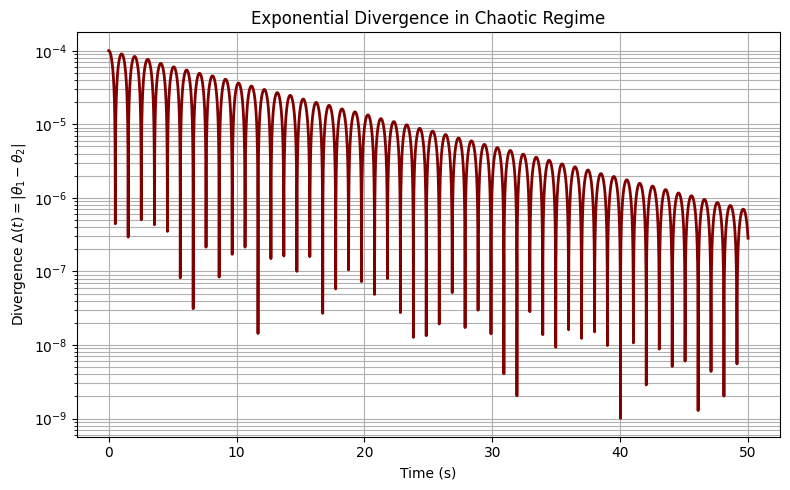

In [4]:
# Parameters
f = 1.5
gamma = 0.2

# Two initial conditions
x0_1 = [0.1, 0.0]
x0_2 = [0.1001, 0.0]

# Run both simulations
t1, x1 = rk3_rhs(pendulum_rhs, x0_1, (0, T), dt, args=(gamma, Omega2, f, omega))
t2, x2 = rk3_rhs(pendulum_rhs, x0_2, (0, T), dt, args=(gamma, Omega2, f, omega))

# Divergence
delta_theta = np.abs(x1[:, 0] - x2[:, 0])

# Plot
plt.figure(figsize=(8, 5))
plt.semilogy(t1, delta_theta, color='maroon', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel(r'Divergence $\Delta(t) = |\theta_1 - \theta_2|$')
plt.title('Exponential Divergence in Chaotic Regime')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


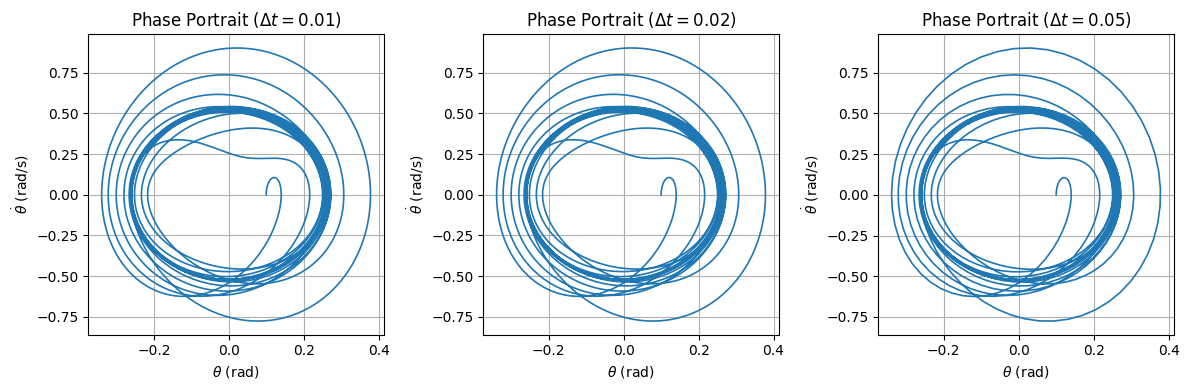

In [5]:
# Test various time steps
dt_values = [0.01, 0.02, 0.05]
trajectories_dt = []

for dt_test in dt_values:
    t, x = rk3_rhs(pendulum_rhs, x0_1, (0, T), dt_test, args=(gamma, Omega2, f, omega))
    trajectories_dt.append((dt_test, t, x))

# Plot
plt.figure(figsize=(12, 4))
for i, (dt_val, t, x) in enumerate(trajectories_dt):
    plt.subplot(1, 3, i+1)
    plt.plot(x[:, 0], x[:, 1], linewidth=1.2)
    plt.title(f'Phase Portrait ($\\Delta t = {dt_val}$)')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\dot{\theta}$ (rad/s)')
    plt.grid(True)
plt.tight_layout()
plt.show()
